In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [65]:
os.chdir('D:\\KSP\\Study\\Houston\\Projects\\Reading Experiment\\Reading Code\\reading_core\\results\\visual_span')

In [66]:
visual_span_filelist=[]
for root,dirs,files in os.walk(os.curdir):
    for file in os.listdir(root):
        if file.endswith('.csv'):
            visual_span_filelist.append(os.path.join(root,file))

In [67]:
visual_span_filelist

['.\\S01\\After\\cjd_span_06262019-01_after.csv',
 '.\\S01\\Before\\cjd_span_06242019-00_before.csv',
 '.\\S02\\After\\lwh_span_06242019-00_after.csv',
 '.\\S02\\Before\\lwh_span_06242019-00_before.csv',
 '.\\S03\\After\\kr_span_06182019-01_after.csv',
 '.\\S03\\Before\\kr_span_06182019-01_before.csv',
 '.\\S04\\After\\vp_span_07022019-00_after.csv',
 '.\\S04\\Before\\vp_span_06182019-00_before.csv',
 '.\\S05\\After\\jp_span_06232019-00_after.csv',
 '.\\S05\\Before\\jp_span_06222019-00_before.csv',
 '.\\S06\\After\\sp_span_06172019-04_after.csv',
 '.\\S06\\Before\\sp_span_06172019-04_before.csv']

   eccentricity  eccentricity_letters  proportion_correct
0         150.0                  22.5                0.50
1         200.0                  30.0                0.25
2        -100.0                 -15.0                0.35
3         -50.0                  -7.5                0.50
4          50.0                   7.5                0.75
5        -150.0                 -22.5                0.15
6           0.0                   0.0                1.00
7         100.0                  15.0                0.50
8        -200.0                 -30.0                0.15
   eccentricity  eccentricity_letters  proportion_correct
0        -200.0                 -30.0                0.15
1         150.0                  22.5                0.60
2        -150.0                 -22.5                0.15
3        -100.0                 -15.0                0.50
4         100.0                  15.0                0.60
5          50.0                   7.5                0.90
6         200.

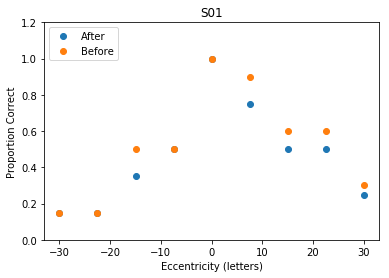

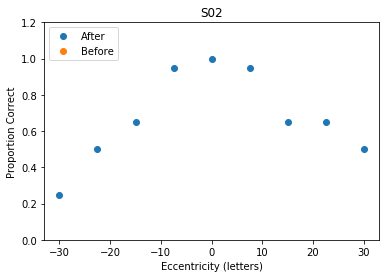

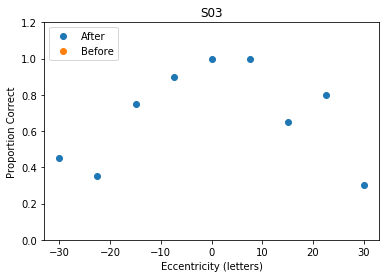

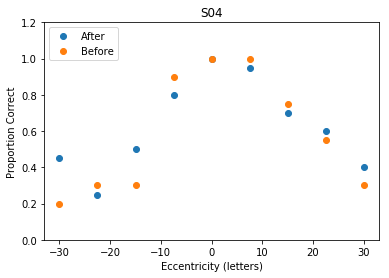

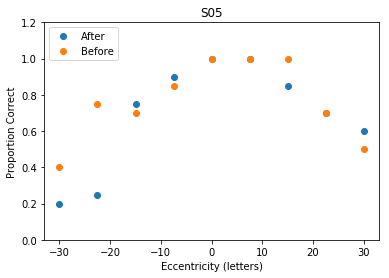

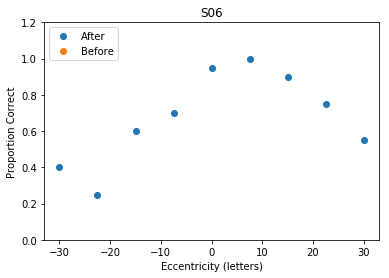

In [75]:
for file_index in range(len(visual_span_filelist)):
#file_index=2
    file_path=visual_span_filelist[file_index]
    visual_span_data=pd.read_csv(file_path)
    if 'before' in file_path.lower():
        condn='Before'
    else:
        condn='After'
    line_pos=file_path.find('S0')
    subject_id=file_path[line_pos:(line_pos+3)]
    #print(visual_span_data)

    all_eccentricities=visual_span_data['ecc']
    eccentricity_list=[]
    for i in range(len(all_eccentricities)):
        if all_eccentricities[i] not in eccentricity_list:
            eccentricity_list.append(all_eccentricities[i])

    pixel_to_letter=200/30
    summary_visual_span=pd.DataFrame({'eccentricity':[],'eccentricity_letters':[],'proportion_correct':[]})
    for i in range(len(eccentricity_list)):
        eccentricity=eccentricity_list[i]
        #TODO: Recheck the coversion factor
        eccentricity_letters=eccentricity/pixel_to_letter
        aggregate_response=visual_span_data[visual_span_data['ecc']==eccentricity]['corr'].mean()
        summary_visual_span=summary_visual_span.append({'eccentricity':eccentricity,'eccentricity_letters':eccentricity_letters,'proportion_correct':aggregate_response},ignore_index=True)
    print(summary_visual_span)
    
    if (file_index % 2) == 0:
        plt.figure(file_index) 
    plt.plot(summary_visual_span['eccentricity_letters'],summary_visual_span['proportion_correct'],'o',label=condn)
    plt.title(subject_id)
    plt.ylabel('Proportion Correct')
    plt.xlabel('Eccentricity (letters)')
    plt.legend(loc='upper left')
    plt.ylim([0,1.2])
    if (file_index % 2) != 0:
        plt.savefig('%s.tif'%(subject_id))